In [327]:
# Udacity Final Project - Python Data Analysis
# David Petersen djpetersen@gmail.com 4153363948

# Import county-level Presidential election data from 2016, correct data problems.
# Import county-level Presidential election data from 2016, update with information
# from a second source. Merge two datasets at the county level and analyze vote 
# totals to understand who came out to vote in key geographic areas.

import numpy as np
import pandas as pd
import seaborn as sns

In [485]:
def float_maker(dataset,field):
    '''Convert a field to float for formatting'''
    field_float = dataset[field] / 1.0 
    return field_float

In [496]:
# ***Import 2016 vote counts by county from microsoft excel***
spreadsheet_2016 = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/election_2016.xlsx')
#print spreadsheet_2016.sheet_names # get names of sheets
df_2016 = spreadsheet_2016.parse('election_2016')
df_2016.rename(columns={'Trump':'Trump_2016','Clinton':'Clinton_2016'}, inplace=True)

df_2016['Trump_2016'] = float_maker(df_2016,'Trump_2016')
df_2016['Clinton_2016'] = float_maker(df_2016,'Clinton_2016')

# Calculate total votes - approx 60M for each candidate
# Note: 2016 totals still preliminary until likely end of December (absentees, etc)
federal_totals_2016 = df_2016.sum() # national level
print federal_totals_2016
state_totals_2016 = df_2016.groupby('State').sum() # state level
print state_totals_2016

State           AlaskaAlabamaAlabamaAlabamaAlabamaAlabamaAlaba...
County          AlaskaAutaugaBaldwinBarbourBibbBlountBullockBu...
Trump_2016                                             61,124,679
Clinton_2016                                           62,389,795
Reporting                                                   4,568
dtype: object
                Trump_2016  Clinton_2016  Reporting
State                                              
Alabama          1,306,925       718,084         67
Alaska             130,415        93,007          1
Arizona          1,021,154       936,250         15
Arkansas           677,904       378,729         75
California       3,841,134     7,230,699         58
Colorado         1,137,455     1,212,209         64
Connecticut        668,266       884,432        167
DC                  11,553       260,223          1
Delaware           185,103       235,581          3
Florida          4,605,515     4,485,745         67
Georgia          2,068,623     1

In [508]:
# Add state abbreviations to 2016 dataset for downstream merge with 2012
state_abbreviations = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/state_abbreviations.xlsx')
# print state_abbreviations.sheet_names # get names of sheets
df_abbrev = state_abbreviations.parse('Sheet1') # Create pandas dataframe
# print df_2016.head() # checked - file has State and County
# print df_abbrev.head() # checked - file has state_name and state_abbreviation

df_2016_final = pd.merge(df_2016, df_abbrev, how='left', left_on = ['State'],
    right_on = ['state_name'])

df_2016_final.head() # checking results - OK

,State,County,Trump_2016,Clinton_2016,Reporting,state_name,state_abbreviation
0,Alaska,Alaska,"130,415","93,007",1,Alaska,AK
1,Alabama,Autauga,"18,110","5,908",1,Alabama,AL
2,Alabama,Baldwin,"72,780","18,409",1,Alabama,AL
3,Alabama,Barbour,"5,431","4,848",1,Alabama,AL
4,Alabama,Bibb,"6,733","1,874",1,Alabama,AL


In [509]:
# ***Import 2012 vote counts by county from Microsoft excel***
spreadsheet_2012 = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/election_2012.xlsx')
# print spreadsheet_2012.sheet_names # determine sheet names
df_2012 = spreadsheet_2012.parse('full_data')
#print df_2012[df_2012['state_postal'] == 'DC']

In [510]:
# Resolving 2012 data problems
# drop FIPs code = 0 in 2012 dataset, it was used to indicate state totals
df_2012 = df_2012[df_2012.FIPS_code != 0] 

# Check to see if columns have mixed names
print df_2012.groupby('name_1').sum()
print df_2012.groupby('name_2').sum()
# Resulting answer is "yes", last_name not always same candidate, will need to fix


        county_num  FIPS_code  total_votes  order_1   votes_1  order_2  \
name_1                                                                   
Goode       386919     515983      2419698      384      5807       64   
Obama    114699993  127309660    103745130     4031  53009878     8124   
Romney     6691798    7784085     16076578      928   8083506      602   
Stein      1305435    1421841       923301      203      3378      174   

         votes_2  order_3   votes_3  order_4  votes_4  order_5  votes_5  
name_1                                                                   
Goode    1238490      128 1,125,391      576   32,262      832    6,894  
Obama   49029018   12,667   696,374   15,525  366,880    8,677  289,944  
Romney   6994402    1,926   905,565    1,486   63,456      699    7,934  
Stein        345       58   671,747       29  229,463      145   11,071  
         county_num  FIPS_code  total_votes  order_1   votes_1  order_2  \
name_2                              

In [511]:
def find_votes(dataset,candidate):
    '''Create a function that can find the number of votes for a given
    candidate, regardless of their position in the file'''
    votes = []
    start_col = 9 # this is where vote and candidate starts in df
    col_count = len(dataset.columns)
    candidate_col = range(start_col,col_count)
    for i, r in dataset.iterrows(): # iterate over rows
        for k in candidate_col: # iterate over columns
            if r[k] == candidate:
                votes.append((r[k+1])) # votes always in col next to candidate
    return votes

In [512]:
# Find Obama and Romney votes, append to original dataframe
df_2012['Obama'] = find_votes(df_2012,'Obama')
df_2012['Romney'] = find_votes(df_2012,'Romney')
# Calculate 2012 vote totals
print df_2012['Obama'].sum()
print df_2012['Romney'].sum()
# Votes totals are 4M short for each candidate, looks like 
# county level results were not posted as final

62301929.0
58909662.0


In [513]:
# I found another data source (Wikipedia) which had county level data
# finalized for many, but not all states. Will use to update my 2012 information.
# Import 2012 county updates from microsoft excel
spreadsheet_2012_update = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/updates_2012.xlsx')
#print spreadsheet_2016.sheet_names # get names of sheets
df_2012_update = spreadsheet_2012_update.parse('Sheet1')

In [522]:
# Find keys to merge original 2012 dataset and update counties
# print df_2012.head() # Result: Need state_postal and county_name
# print df_2012_update.head() # Result: Need State and County

# Merge 2012 datasets to get updates
df_2012_final = pd.merge(df_2012, df_2012_update, how='left', left_on = ['state_postal', 'county_name'],
    right_on = ['State', 'County'])

# print df_2012_final.head() # Data checking
# print df_2012_final.describe() # Data checking

In [523]:
# Create new final vote totals as max(original data, updated data)
df_2012_final['Obama_2012'] = df_2012_final[['Obama_x','Obama_y']].apply(max, axis=1) # drop NaNs
df_2012_final['Romney_2012'] = df_2012_final[['Romney_x','Romney_y']].apply(max, axis=1) # drop NaNs
df_2012_final.drop(df_2012_final.columns[6:33], axis=1, inplace = True)
df_2012_final['Obama_2012'] = float_maker(df_2012_final,'Obama_2012')
df_2012_final['Romney_2012'] = float_maker(df_2012_final,'Romney_2012')
print df_2012_final.sum() # note: this added about 2M votes to each candidates totals


state_postal    AKALALALALALALALALALALALALALALALALALALALALALAL...
key             AK AlaskaAL AutaugaAL BaldwinAL BarbourAL Bibb...
county_num                                              123084145
FIPS_code                                               137031569
county_name     AlaskaAutaugaBaldwinBarbourBibbBlountBullockBu...
key_2           AK AlaskaAL AutaugaAL BaldwinAL BarbourAL Bibb...
Obama_2012                                             64,863,657
Romney_2012                                            60,352,239
dtype: object


In [525]:
# ***Merging 2012 and 2016 datasets - Preprocessing***
# Before merging the two datasets, need to understand if they have the 
# same counties listed, or any extra rows that might generate erroneous results

print df_2012_final.describe() # note dataframe has 4,588 counties
print df_2016.describe() # note dataframe has *4,586* counties

# First add a state-county key to the 2016 dataset to join them later
df_2016_final['key'] = df_2016_final['state_abbreviation'] + ' ' + df_2016_final['County']
# df_2016_final.head() # checking - OK

# To find unmatched counties, add source keys
key_2012 = pd.DataFrame(df_2012_final['key'])
key_2012['Source'] = '2012_data'
key_2016 = pd.DataFrame(df_2016_final['key'])
key_2016['Source'] = '2016_data'

# Next: Identify how many sources each row had - if it had two
# that means it is in both list. If only 1, that means not common

       county_num  FIPS_code  Obama_2012  Romney_2012
count       4,588      4,588       4,588        4,588
mean       26,827     29,867      14,138       13,154
std        13,278     14,051      59,964       37,020
min         1,001      1,001           0            0
25%        18,023     21,044         792        1,043
50%        24,028     27,056       2,507        3,680
75%        39,018     42,036       6,988        9,826
max        51,408     56,045   2,216,903      885,333
       Trump_2016  Clinton_2016  Reporting
count       4,586         4,586      4,586
mean       13,329        13,604          1
std        33,729        58,778          0
min             0             0          0
25%         1,116           622          1
50%         3,970         2,039          1
75%        10,790         6,212          1
max       620,285     1,893,770          1


In [526]:
def key_count(df1,df2,key_value):
    '''Function takes two datasets, stacks them, and
    determines how many instances there are of each key_value'''
    df_keys = pd.concat([df1, df2])
    key_counter = df_keys.groupby(key_value).count()
    return key_counter

In [527]:
# Find rows that only occurred in a single file
no_matched_county = key_count(key_2012, key_2016,'key')
print no_matched_county[no_matched_county['Source'] < 2]
'''
In first iteration, uncovered the following items as 
having only once source, that is, appearing
in only one file. A couple of misspellings
                         Source
key                            
DC DC                         1
DC District of Columbia       1
ME Bancroft                   1
SD Oglala Lakota              1
SD Shannon                    1
VA Bedford City               1
VT Alburg                     1
VT Alburgh                    1

I fixed DC and Alburg in the original datafiles, will drop other 4 rows 
in the dataset because they are small.
'''

# Dropping unmatching counties
drop_list = ['ME Bancroft', 'SD Oglala Lakota', 'SD Shannon','VA Bedford City']
df_2012_matched = df_2012_final[~df_2012_final.key.isin(drop_list)]
df_2016_matched = df_2016_final[~df_2016_final.key.isin(drop_list)]

# Data checking
#print df_2012_matched.sum()
#print df_2012_matched.describe()
#print df_2016_matched.sum()
#print df_2016_matched.describe()

                  Source
key                     
ME Bancroft            1
SD Oglala Lakota       1
SD Shannon             1
VA Bedford City        1


In [535]:
# Hand check datasets in excel
def output_xls(dataset,file,sheet):
    writer = pd.ExcelWriter(file, engine='xlsxwriter')
    dataset.to_excel(writer, sheet_name=sheet)
    writer.save()
    return None

output_xls(df_2016_matched,'/Users/David/Github/Udacity_Data_Analysis/output_2016.xlsx','Sheet1')
output_xls(df_2012_matched,'/Users/David/Github/Udacity_Data_Analysis/output_2012.xlsx','Sheet1')

In [536]:
# ***Merging datasets***
vote_totals = pd.merge(df_2012_matched, df_2016_matched, how='inner', on='key')
# Get rid of columns that aren't useful
vote_totals.drop(vote_totals.columns[0:5], axis=1, inplace = True)
vote_totals.drop(vote_totals.columns[7], axis=1, inplace = True)
print len(vote_totals.index)
# Verified as 4585 rows, by candidate, county, state

# hand check in excel
output_xls(vote_totals,'/Users/David/Github/Udacity_Data_Analysis/output_merged.xlsx','Sheet1')

# Create new metrics for downstream analysis
vote_totals['Obama-Romney'] = vote_totals['Obama_2012'] - vote_totals['Romney_2012']
vote_totals['Clinton-Trump'] = vote_totals['Clinton_2016'] - vote_totals['Trump_2016']
vote_totals['Clinton-Obama'] = vote_totals['Clinton_2016'] - vote_totals['Obama_2012']
vote_totals['Trump-Romney'] = vote_totals['Trump_2016'] - vote_totals['Romney_2012']

4585


               total_votes
Obama_2012      64,859,499
Romney_2012     60,350,504
Trump_2016      61,124,438
Clinton_2016    62,387,291
Obama-Romney     4,508,995
Clinton-Trump    1,262,853
Clinton-Obama   -2,472,208
Trump-Romney       773,934
Populating the interactive namespace from numpy and matplotlib


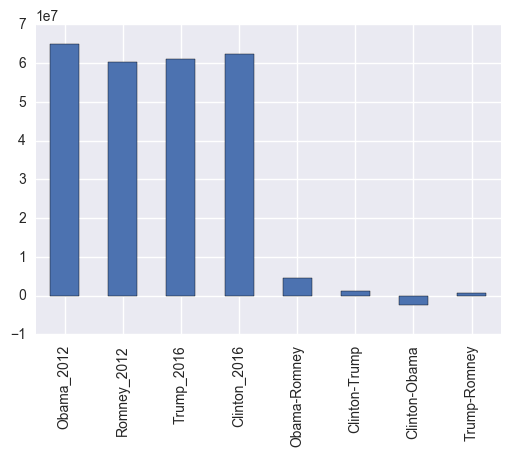

In [551]:
# ***Analysis***
# National Results
national_totals = pd.DataFrame({'total_votes' : vote_totals.sum(axis=0,numeric_only = True)})
print national_totals

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

# plot of total votes
natplot = national_totals.plot.bar(xlim=(60000000,65000000))
natplot.legend_.remove()

In [492]:
def pct_maker(dataset,numer,denom):
    percent_output = dataset[numer] / dataset[denom]
    return percent_output

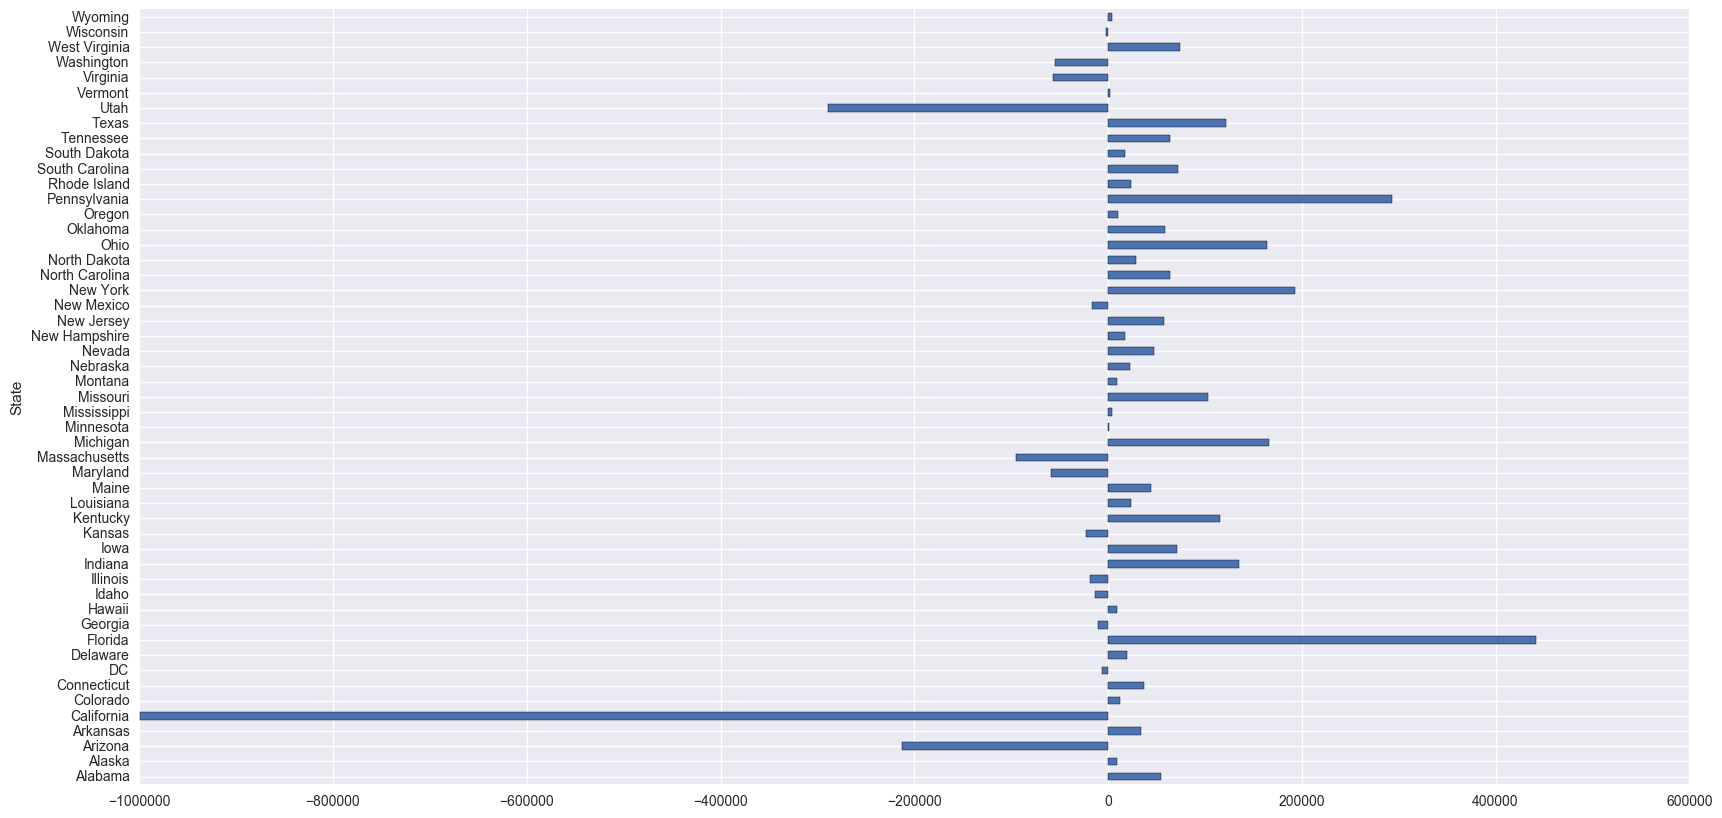

In [493]:
# State-level results
# I am interested in whether Trump was able to bring out more voters 
# in key states. And, did Clinton's higher popular vote total come
# from states she was sure to win (e.g., California)?

state_totals = vote_totals.groupby('State',as_index = True).sum()
state_totals['C-O-Pct'] = pct_maker(state_totals,'Clinton-Obama','Obama_2012')
state_totals['T-R-Pct'] = pct_maker(state_totals,'Trump-Romney','Romney_2012')
stateplot1 = state_totals['Trump-Romney'].plot.barh()
pylab.rcParams['figure.figsize'] = (20, 10)

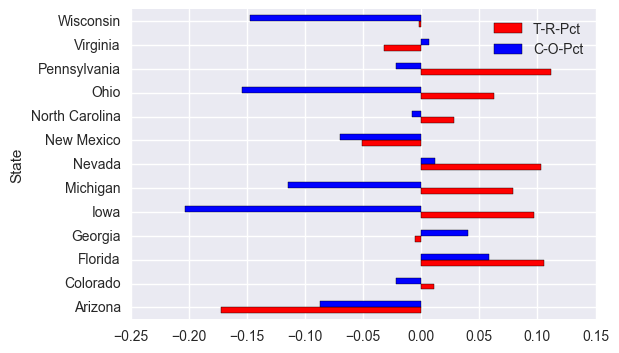

In [552]:
# Anayze only "swing states" - which have recently been competitive
swing_states = ['Colorado','Pennsylvania','Virginia','Wisconsin','Michigan','Iowa',
    'Ohio','Arizona','New Mexico','Florida','North Carolina','Nevada','Georgia']
swing_state_totals = state_totals[state_totals.index.isin(swing_states)]
swing_state_pct = swing_state_totals.drop(swing_state_totals[[0,1,2,3,4,5,6,7]], axis = 1)

#print swing_state_pct # data checking - OK

# Print plot showing how far Clinton ran behind Obama, and Trump ran vs. Romney, by swing state
my_colors = ['r', 'b']
swing_states_plot = swing_state_pct.plot.barh(color=my_colors)
pylab.rcParams['figure.figsize'] = (20, 10)



In [557]:
# Analyze county-level data in key swing states
# Pennsylvania

print 'Pennsylvania State Totals:' + '\n'
print state_totals[state_totals.index == 'Pennsylvania']
print '\n'*2

pa_totals = vote_totals[vote_totals['state_name'] == ('Pennsylvania')]
pa_totals_pct = pa_totals.drop(pa_totals[['key_2','State','state_abbreviation']], axis = 1)
#recalculate percentages at county level
pa_totals_pct['C-O-Pct'] = pct_maker(pa_totals_pct,'Clinton-Obama','Obama_2012')
pa_totals_pct['T-R-Pct'] = pct_maker(pa_totals_pct,'Trump-Romney','Romney_2012')
pd.set_option('display.max_rows', 500)

# Add regions to Pennsylvania to simplify looking at 66 different counties
pa_regions_file = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/pa_regions.xlsx')
pa_regions = pa_regions_file.parse('Sheet1')
pa_pct_withregion = pd.merge(pa_totals_pct, pa_regions, how='left', left_on = ['County'],
    right_on = ['County'])

pa_region_totals = pa_pct_withregion.groupby('Region',as_index = True).sum()
pa_region_totals['C-O-Pct'] = pct_maker(pa_region_totals,'Clinton-Obama','Obama_2012')
pa_region_totals['T-R-Pct'] = pct_maker(pa_region_totals,'Trump-Romney','Romney_2012')

pd.options.display.float_format = '{:,.0f}'.format
pa_region_totals['Trump_2016'] = float_maker(pa_region_totals,'Trump_2016')
pa_region_totals['Clinton_2016'] = float_maker(pa_region_totals,'Clinton_2016')

print '\n'*2
print 'Raw Votes by Candidate: '
print pa_region_totals.ix[:,0:4] # raw votes by candidate
print '\n'*2
print 'Differences among candidates:'
print pa_region_totals.ix[:,4:9] # differences between candidates and years

Pennsylvania State Totals:

              Obama_2012  Romney_2012  Trump_2016  Clinton_2016  Obama-Romney  \
State                                                                           
Pennsylvania   2,907,448    2,619,583     2912941       2844705       287,865   

              Clinton-Trump  Clinton-Obama  Trump-Romney  T-R-Pct  C-O-Pct  
State                                                                       
Pennsylvania         -68236        -62,743       293,358        0       -0  






Raw Votes by Candidate: 
                    Obama_2012  Romney_2012  Trump_2016  Clinton_2016
Region                                                               
Allegheny               90,576      150,617     174,617        81,823
Amish Country          405,529      559,083     618,661       395,121
Great Lakes            108,711      102,831     126,368        88,555
Laurel Highlands       244,450      374,516     427,885       212,601
Lehigh Valley          816,239      679,662   

In [579]:
# Analyze county-level data in key swing states
# Wisconsin - data above showed Trump didn't really gain many votes over Romney, but Clinton fell off.
# Was that true everywhere throughout the state?
print 'Wisconsin State Totals:'
print state_totals[state_totals.index == 'Wisconsin']
print

wi_totals = vote_totals[vote_totals['state_name'] == ('Wisconsin')]
wi_totals_pct = wi_totals.drop(wi_totals[['key_2','State','state_abbreviation']], axis = 1)
#recalculate percentages at county level
wi_totals_pct['C-O-Pct'] = wi_totals_pct['Clinton-Obama'] / wi_totals_pct['Obama_2012']
wi_totals_pct['T-R-Pct'] = wi_totals_pct['Trump-Romney'] / wi_totals_pct['Romney_2012']
pd.set_option('display.max_rows', 500)

wi_totals_pct.set_index('County')

cols = wi_totals_pct.columns.tolist()
cols = cols[2:3] + cols[0:2] + cols[3:5]
wi_totals_pct = wi_totals_pct.ix[:, cols]
print 'Wisconsin County Data: ' + '\n'
print wi_totals_pct

# Add regions to Wisconsin to simplify looking at 66 different counties
wi_regions_file = pd.ExcelFile('/Users/David/Github/Udacity_Data_Analysis/wi_counties.xlsx')
wi_regions = wi_regions_file.parse('Sheet1')
wi_pct_withregion = pd.merge(wi_totals_pct, wi_regions, how='left', left_on = ['County'],
    right_on = ['County'])

wi_region_totals = wi_pct_withregion.groupby('Region',as_index = True).sum()
print '\n' + 'Wisconsin Region Totals: ' + '\n'
print wi_region_totals

Wisconsin State Totals:
           Obama_2012  Romney_2012  Trump_2016  Clinton_2016  Obama-Romney  \
State                                                                        
Wisconsin   1,621,486    1,411,723     1409467       1382210       209,763   

           Clinton-Trump  Clinton-Obama  Trump-Romney  T-R-Pct  C-O-Pct  
State                                                                    
Wisconsin         -27257       -239,276        -2,256       -0       -0  

Wisconsin County Data: 

           County  Obama_2012  Romney_2012  Trump_2016  Clinton_2016
4435        Adams       5,542        4,644       5,983         3,780
4436      Ashland       5,399        2,820       3,428         4,136
4437       Barron      10,890       11,443      13,595         7,881
4438     Bayfield       6,033        3,606       4,125         4,953
4439        Brown      62,526       64,836      67,192        53,358
4440      Buffalo       3,570        3,364       4,049         2,531
4441      